# Домашняя работа по уроку 4.2
### Выполнил Мартысюк Илья. группа PY-3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

PATH = '/Users/martysyuk/Documents/Python 3 Coding/Repositorys/PY-3-Learning/homeworks/names/'
START_YEAR = 1900
STOP_YEAR = 2000
NAMES = ['Ruth', 'Robert']
CONCAT_ON = ['Year', 'Pos']
COLUMNS = ['Name', 'Gender', 'Count']

In [26]:
def get_data_from_file(_start, _stop, _step):
    _data = dict()
    if _start == _stop:
        _file_name = PATH + 'yob' + str(_start) + '.txt'
        _data[_start] = pd.read_csv(_file_name, names=COLUMNS)
    else:
        for _year in range(_start, _stop, _step):
            _file_name = PATH + 'yob' + str(_year) + '.txt'
            _data[_year] = pd.read_csv(_file_name, names=COLUMNS)
    try:
        _pd_data = pd.concat(_data, names=CONCAT_ON)
    except ValueError:
        _pd_data = pd.DataFrame(data=_data, columns=COLUMNS)
    
    return _pd_data


def compile_data_to_step_1_2(step):
    _data = get_data_from_file(START_YEAR, STOP_YEAR, step)
    _data = _data.groupby([_data.index.get_level_values(0), 'Name']).sum()
    _return_data = _data.query('Name == {}'.format(NAMES)).unstack('Name')
    return _return_data


def compile_data_to_step_3(_step, _year):
    _names = list()
    _data = get_data_from_file(_year, _year, _step)
    _data = _data.groupby('Name').sum()
    for _name in _data.index.get_level_values(0):
        if _name.startswith('R'):
            _names.append(_name)
    _data = _data.query('Name == {}'.format(_names)).sort_values(by='Count', ascending=False).head(10)
    return _data

Задание 1: Построить график изменения количества имен Ruth и Robert с 1900 по 2000


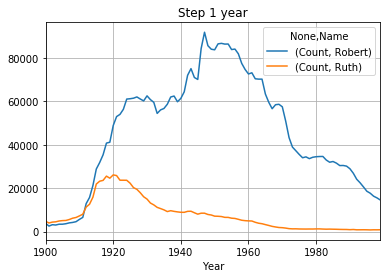

In [22]:
print('Задание 1: Построить график изменения количества имен Ruth и Robert с 1900 по 2000')
plot_data = compile_data_to_step_1_2(1)
plot_data.plot(title='Step 1 year', grid=True)

Задание 2: Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками.


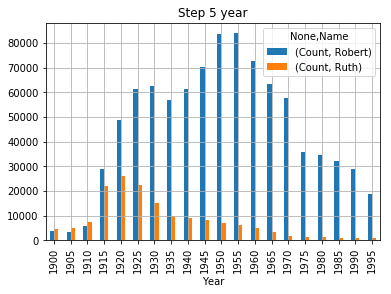

In [27]:
print('Задание 2: Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками.')
plot_data = compile_data_to_step_1_2(5)
plot_data.plot.bar(title='Step 5 year', grid=True)

Задание 3: Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен,начинающихся на R, за 1950 год.


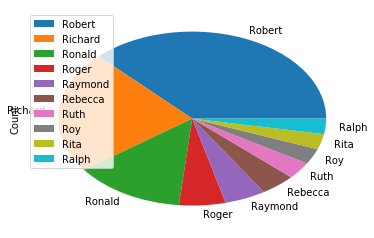

In [28]:
print('Задание 3: Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен,'
      'начинающихся на R, за 1950 год.')
plot_data = compile_data_to_step_3(1, 1950)
plot_data.plot.pie(y='Count')